In [1]:
# -*- coding: utf-8 -*-
"""
Generate synthetic low dimensional manifold in a 6D space.

Task for students: Extend the script to find the manifold
using an auto-encoder. See assignment details on Blackboard
"""

import torch
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import torch.optim as optim
import pandas as pd
import time

student_id=10818755

np.random.seed(student_id)

n_samples=300

In [2]:

def make_manifold_samples(n_samples):
    """Generate samples in a low dimensional space"""
    X=np.zeros([n_samples,5])
    X[:,0]=np.arange(-2,2,4/n_samples)
    X[:,1]=np.random.random(n_samples)-0.5
    if (student_id%2==0):
        X[:,2]=np.random.random(n_samples)-0.5
    X[:,3]=np.sin(4*X[:,0])
    if (student_id%3==0):
        X[:,4]=X[:,0]**2
    return X

# Initialise the weights to random values
def init_weights(m):
    if isinstance(m, torch.nn.Linear):
        m.weight.data.uniform_(-1,1)
        m.bias.data.fill_(0.01)


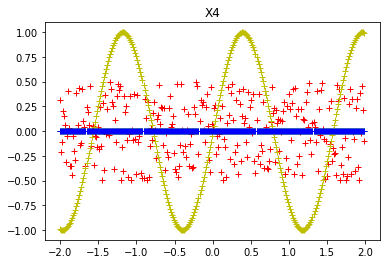

Shape of X6:  (300, 6)


In [3]:
X4=make_manifold_samples(n_samples)
plt.figure()
plt.plot(X4[:,0],X4[:,1],"r+")
plt.plot(X4[:,0],X4[:,2],"g+")
plt.plot(X4[:,0],X4[:,3],"y+")
plt.plot(X4[:,0],X4[:,4],"b+")
plt.title("X4")
plt.show()

# Generate random projection
P=np.random.random([6,5])

X6=X4@P.T

print("Shape of X6: ",X6.shape)

Total time spent optimizing: 215.6sec.
Total time spent optimizing: 215.2sec.
Total time spent optimizing: 224.3sec.
Total time spent optimizing: 218.8sec.
Total time spent optimizing: 221.5sec.
Total time spent optimizing: 227.2sec.
Total time spent optimizing: 229.1sec.
Total time spent optimizing: 220.5sec.
Total time spent optimizing: 215.4sec.
Total time spent optimizing: 226.2sec.
Total time spent optimizing: 226.9sec.
Total time spent optimizing: 225.8sec.
Total time spent optimizing: 223.3sec.
Total time spent optimizing: 222.4sec.


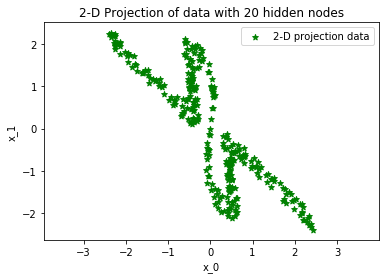

Total time spent optimizing: 220.5sec.


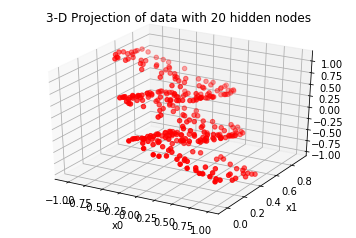

Total time spent optimizing: 221.1sec.


In [4]:
n_hidden = np.array([5,10,15,20])
n_latent = np.array([1,2,3,4])
Xt=torch.tensor(X6,dtype=torch.float32)
nd = 6

df = pd.DataFrame(columns = ['n_hidden','n_latent','total_loss','computed time'])
k = 0

rcn_error = np.array([])

for i in n_hidden:
    for j in n_latent:
        
        model = torch.nn.Sequential(
                torch.nn.Linear(nd, i),
                torch.nn.Sigmoid(),
                torch.nn.Linear(i, j),
                torch.nn.Linear(j, i),
                torch.nn.Sigmoid(),
                torch.nn.Linear(i,nd)
                )
        
        model.apply(init_weights)

        # Mean square error loss
        loss_fn = torch.nn.MSELoss()
        
        optimizer = optim.Adam(model.parameters(), lr=1e-3)
        
        # Number of samples per batch
        # Must divide number of samples exactly
        batch_size=25
        
        # Number of complete passes through all data
        n_epochs=15000
        
        start_time=time.perf_counter()
        
        for ep in range(n_epochs):
            # Randomly permute the data so it is presented
            # in a different order in each epoch
            perm=np.random.permutation(n_samples)
            
            # Total loss is sum over all batches
            total_loss=0
            
            for b in range(round(n_samples/batch_size)):
                # Pick out the b-th chunk of the data
                batch_perm=perm[b*batch_size:(b+1)*batch_size]
                y_pred = model(Xt[batch_perm])
            
                loss = loss_fn(y_pred, Xt[batch_perm])
                total_loss+=loss.item()
           
                # Zero the gradients before running the backward pass.
                model.zero_grad()
            
                # Compute gradients. 
                loss.backward()
            
                # Use the optimizer to update the weights
                optimizer.step()
                    
            # if ((ep+1)%100==0):  # Print every 100th epoch
                # print(ep+1, total_loss)
            
        end_time=time.perf_counter()
        print("Total time spent optimizing: {:0.1f}sec.".format(end_time-start_time))
        df.loc[k] = [i,j,total_loss,end_time-start_time]
        rcn_error = np.append(rcn_error, total_loss)
        k = k+1
        
        if i == 20 and j == 2:
            y=model[0:3](Xt)
            ynp=y.detach().numpy()
            
            plt.figure()
            plt.scatter(ynp[:,0], ynp[:,1],marker="*",c="g",label="2-D projection data")
            plt.legend()
            plt.axis('equal')
            plt.xlabel("x_0")
            plt.ylabel("x_1")
            plt.title("2-D Projection of data with 20 hidden nodes")
            plt.savefig('Projection of 2-D 20x2.png')
            plt.show()
            
        if i == 20 and j == 3:
            y=model[0:3](Xt)
            ynp=y.detach().numpy()
            
            fig = plt.figure()
            ax = fig.gca(projection='3d')
            ax.scatter(ynp[:,0],ynp[:,1],ynp[:,2],color='red',label="3-D projection data")
            plt.xlabel("x0")
            plt.ylabel("x1")
            plt.title("3-D Projection of data with 20 hidden nodes")
            plt.savefig('Projection of 3-D 20x3.png')
            plt.show()
        

    n_hidden  n_latent  total_loss  computed time
0        5.0       1.0    0.567670     215.618254
1        5.0       2.0    0.097460     215.200357
2        5.0       3.0    0.001290     224.284666
3        5.0       4.0    0.001525     218.828473
4       10.0       1.0    0.433546     221.454635
5       10.0       2.0    0.070173     227.199018
6       10.0       3.0    0.000682     229.089435
7       10.0       4.0    0.000183     220.494795
8       15.0       1.0    0.358563     215.355107
9       15.0       2.0    0.060594     226.162372
10      15.0       3.0    0.000205     226.946029
11      15.0       4.0    0.000199     225.796800
12      20.0       1.0    0.406628     223.341886
13      20.0       2.0    0.002766     222.379828
14      20.0       3.0    0.000380     220.518050
15      20.0       4.0    0.000125     221.068658


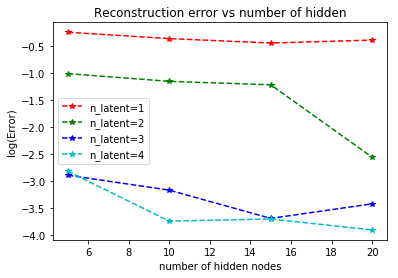

In [5]:
print(df)

rcn_error_4x4 = rcn_error.reshape(4,4)
plt.figure()
plt.plot(n_hidden,np.log10(rcn_error_4x4[:,0]),"r*--",label="n_latent=1")
plt.plot(n_hidden,np.log10(rcn_error_4x4[:,1]),"g*--",label="n_latent=2")
plt.plot(n_hidden,np.log10(rcn_error_4x4[:,2]),"b*--",label="n_latent=3")
plt.plot(n_hidden,np.log10(rcn_error_4x4[:,3]),"c*--",label="n_latent=4")
# plt.axis('equal')
plt.title("Reconstruction error vs number of hidden")
plt.xlabel("number of hidden nodes")
plt.ylabel("log(Error)")
plt.savefig('rcnError vs number of hidden.png')
plt.legend()
plt.show()

